In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from keras import *
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras import regularizers
from keras.optimizers import Adam, RMSprop
from keras.backend import clear_session

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/AML_project/train_manipulated_integrated.csv")

In [ ]:
y_train = train['trip_duration'].values.reshape(-1, 1)

X_train = train.drop(columns = ['trip_duration'])

#divisione train test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.30,
                                                  random_state = 1234)

In [ ]:
#divisione train validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15,
                                                  random_state = 1234)

In [ ]:
#si separano le dummies dalle quantitative

X_train_to_stand = X_train[['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']]

X_train_not_stand = X_train.drop(columns = ['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']).values


X_val_to_stand = X_val[['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']]

X_val_not_stand = X_val.drop(columns = ['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']).values

X_test_to_stand = X_test[['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']]

X_test_not_stand = X_test.drop(columns = ['passenger_count', 'distance',
                                            'maximum temperature', 'minimum temperature',
                                           'average temperature',
                                           'precipitation', 
                                           'snow fall',
                                           'snow depth', 'direction']).values

In [ ]:
#standardizzazione
scaler = StandardScaler()

X_train_stand = scaler.fit_transform(X_train_to_stand)
y_train_stand = scaler.fit(y_train).transform(y_train)

X_val_stand = scaler.fit(X_train_to_stand).transform(X_val_to_stand)
y_val_stand = scaler.fit(y_train).transform(y_val)

X_test_stand = scaler.fit(X_train_to_stand).transform(X_test_to_stand)
y_test_stand = scaler.fit(y_train).transform(y_test)

In [ ]:
X_train = np.concatenate((X_train_stand, X_train_not_stand), axis = 1)
X_val = np.concatenate((X_val_stand, X_val_not_stand), axis = 1)
X_test = np.concatenate((X_test_stand, X_test_not_stand), axis = 1)

y_train = y_train_stand
y_val = y_val_stand
y_test = y_test_stand

In [ ]:
#modello con parametri discrezionali

initializer = tf.keras.initializers.GlorotUniform(seed=1000)


opt = tf.keras.optimizers.SGD(learning_rate= 0.002, momentum=0.3, 
                              nesterov = False)

model_no_opt = Sequential()
model_no_opt.add(Dense(256, input_shape = (48,),
                activation = "relu", 
                kernel_regularizer= regularizers.l1(0.0005),
                kernel_initializer=initializer))
model_no_opt.add(Dense(128,
                activation = "relu",kernel_regularizer= regularizers.l1(0.0005), 
                kernel_initializer=initializer))
model_no_opt.add(Dense(128,
                activation = "relu", 
                kernel_regularizer= regularizers.l1(0.0005),
                kernel_initializer=initializer))
model_no_opt.add(Dense(32,
                activation = "relu", 
                kernel_regularizer= regularizers.l1(0.0005),
                kernel_initializer=initializer))
model_no_opt.add(Dense(1,
                activation = "linear", 
                kernel_regularizer= regularizers.l1(0.0005),
                kernel_initializer=initializer))
model_no_opt.compile(loss = "mse", optimizer=opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])

model_no_opt.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               12544     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 66,113
Trainable params: 66,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

history_no_opt = model_no_opt.fit(X_train, y_train, epochs = 100, 
            batch_size = 128, validation_data=(X_val, y_val),
            shuffle = True,
            callbacks = es,
            verbose=2)

Epoch 1/100
6696/6696 - 14s - loss: 2.4894 - root_mean_squared_error: 0.5981 - val_loss: 2.2907 - val_root_mean_squared_error: 0.5537
Epoch 2/100
6696/6696 - 14s - loss: 2.1563 - root_mean_squared_error: 0.5582 - val_loss: 1.9979 - val_root_mean_squared_error: 0.5374
Epoch 3/100
6696/6696 - 14s - loss: 1.8816 - root_mean_squared_error: 0.5486 - val_loss: 1.7394 - val_root_mean_squared_error: 0.5324
Epoch 4/100
6696/6696 - 15s - loss: 1.6351 - root_mean_squared_error: 0.5442 - val_loss: 1.5042 - val_root_mean_squared_error: 0.5277
Epoch 5/100
6696/6696 - 15s - loss: 1.4128 - root_mean_squared_error: 0.5413 - val_loss: 1.2929 - val_root_mean_squared_error: 0.5250
Epoch 6/100
6696/6696 - 14s - loss: 1.2130 - root_mean_squared_error: 0.5391 - val_loss: 1.1042 - val_root_mean_squared_error: 0.5230
Epoch 7/100
6696/6696 - 15s - loss: 1.0353 - root_mean_squared_error: 0.5370 - val_loss: 0.9380 - val_root_mean_squared_error: 0.5209
Epoch 8/100
6696/6696 - 15s - loss: 0.8797 - root_mean_squared

In [ ]:
train_no_opt_mse = history_no_opt.history['loss']
val_no_opt_mse = history_no_opt.history['val_loss']

train_no_opt_rmse = history_no_opt.history['root_mean_squared_error']
val_no_opt_rmse = history_no_opt.history['val_root_mean_squared_error']

In [ ]:
train_no_opt_mse = history_no_opt.history['loss']
val_no_opt_mse = history_no_opt.history['val_loss']

train_no_opt_rmse = history_no_opt.history['root_mean_squared_error']
val_no_opt_rmse = history_no_opt.history['val_root_mean_squared_error']

In [ ]:
perf_no_opt_l1 = pd.DataFrame({'epochs': list(np.arange(0, 98)[0:98]), 
                               'loss':train_no_opt_mse,
                               'val_loss':val_no_opt_mse,
                               'rmse': train_no_opt_rmse,
                               'val_rmse': val_no_opt_rmse})

#backup per non riallenare
perf_no_opt_l1.to_csv("/content/drive/MyDrive/AML_project/modelli/modelli salvati/L1_reg/perf_no_opt_l1.csv", 
                      index = False)
model_no_opt.save("/content/drive/MyDrive/AML_project/modelli/modelli salvati/L1_reg/model_no_opt_l1.h5")

In [ ]:
#modello ottimizzato

activations = "relu"
units_1 = 64
units_2 = 112
units_3 = 64
lambda_1 = 0.0004268971223779536

initializer = tf.keras.initializers.GlorotUniform()


opt = tf.keras.optimizers.SGD(learning_rate= 0.002, momentum=0.2, 
                              nesterov = False)

model = Sequential()
model.add(Dense(64, input_shape = (48,),
                activation = activations, 
                kernel_regularizer= regularizers.l1(lambda_1),
                kernel_initializer=initializer))
model.add(Dense(112,
                activation = activations, 
                kernel_regularizer= regularizers.l1(lambda_1),
                kernel_initializer=initializer))
model.add(Dense(64,
                activation = activations, 
                kernel_regularizer= regularizers.l1(lambda_1),
                kernel_initializer=initializer))
model.add(Dense(1,
                activation = "linear", 
                kernel_regularizer= regularizers.l1(lambda_1),
                kernel_initializer=initializer))
model.compile(loss = "mse", optimizer=opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                3136      
_________________________________________________________________
dense_15 (Dense)             (None, 112)               7280      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                7232      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 17,713
Trainable params: 17,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs = 100, 
            batch_size = 128, validation_data=(X_val, y_val),
            shuffle = True,
            callbacks = es,
            verbose=2)

Epoch 1/100
6696/6696 - 14s - loss: 1.0834 - root_mean_squared_error: 0.6216 - val_loss: 0.9951 - val_root_mean_squared_error: 0.5688
Epoch 2/100
6696/6696 - 14s - loss: 0.9746 - root_mean_squared_error: 0.5724 - val_loss: 0.9272 - val_root_mean_squared_error: 0.5517
Epoch 3/100
6696/6696 - 14s - loss: 0.9126 - root_mean_squared_error: 0.5597 - val_loss: 0.8715 - val_root_mean_squared_error: 0.5433
Epoch 4/100
6696/6696 - 14s - loss: 0.8597 - root_mean_squared_error: 0.5531 - val_loss: 0.8203 - val_root_mean_squared_error: 0.5373
Epoch 5/100
6696/6696 - 14s - loss: 0.8118 - root_mean_squared_error: 0.5492 - val_loss: 0.7735 - val_root_mean_squared_error: 0.5334
Epoch 6/100
6696/6696 - 14s - loss: 0.7672 - root_mean_squared_error: 0.5465 - val_loss: 0.7308 - val_root_mean_squared_error: 0.5314
Epoch 7/100
6696/6696 - 14s - loss: 0.7252 - root_mean_squared_error: 0.5443 - val_loss: 0.6908 - val_root_mean_squared_error: 0.5300
Epoch 8/100
6696/6696 - 13s - loss: 0.6857 - root_mean_squared

Performance

In [ ]:
metrics_no_opt_train = model_no_opt.evaluate(X_val, y_val, verbose = 0, batch_size = 128)
metrics_no_opt_val = model_no_opt.evaluate(X_val, y_val, verbose = 0, batch_size = 128)
metrics_no_opt_test = model_no_opt.evaluate(X_test, y_test, verbose = 0, batch_size = 128)

metrics_opt_train = model.evaluate(X_train, y_train, verbose = 0, batch_size = 128)
metrics_opt_val = model.evaluate(X_val, y_val, verbose = 0, batch_size = 128)
metrics_opt_test = model.evaluate(X_test, y_test, verbose = 0, batch_size = 128)
##################################


mse_no_opt_train = metrics_no_opt_train[0] #mse
mse_no_opt_val = metrics_no_opt_val[0] #mse
mse_no_opt_test = metrics_no_opt_test[0] #mse

rmse_no_opt_train = metrics_no_opt_train[1] #rmse
rmse_no_opt_val = metrics_no_opt_val[1] #rmse
rmse_no_opt_test = metrics_no_opt_test[1] #rmse

#################################################

mse_opt_train = metrics_opt_train[0] #mse
mse_opt_val = metrics_opt_val[0] #mse
mse_opt_test = metrics_opt_test[0] #mse

rmse_opt_train = metrics_opt_train[1] #rmse
rmse_opt_val = metrics_opt_val[1] #rmse
rmse_opt_test = metrics_opt_val[1] #rmse

###############################################

print("mse train opt", mse_opt_train)
print("mse val opt", mse_opt_val)
print("mse test opt", mse_opt_test)

print("mse train opt", rmse_opt_train)
print("mse val opt", rmse_opt_val)
print("mse test opt", rmse_opt_test)

############################################
print("___________________________")
print("mse train no opt", mse_no_opt_train)
print("mse val no opt", mse_no_opt_val)
print("mse test no opt", mse_no_opt_test)

print("mse train no opt", rmse_no_opt_train)
print("mse val no opt", rmse_no_opt_val)
print("mse test no opt", rmse_no_opt_test)

mse train opt 0.28533703088760376
mse val opt 0.27006736397743225
mse test opt 0.28080055117607117
mse train opt 0.5124977827072144
mse val opt 0.4973776042461395
mse test opt 0.4973776042461395
___________________________
mse train no opt 0.2702392637729645
mse val no opt 0.2702392637729645
mse test no opt 0.2813638150691986
mse train no opt 0.49623870849609375
mse val no opt 0.49623870849609375
mse test no opt 0.5073240399360657


In [ ]:
train_opt_loss = history.history['loss']
val_opt_loss = history.history['val_loss']

train_opt_rmse = history.history['root_mean_squared_error']
val_opt_rmse = history.history['val_root_mean_squared_error']

perf_opt_l1 = pd.DataFrame({'epochs': list(np.arange(0, 100)[0:100]), 
                               'loss':train_opt_loss,
                               'val_loss':val_opt_loss,
                            'rmse': train_opt_rmse,
                            'val_rmse':val_opt_rmse})
#backup per npn riallenare
perf_opt_l1.to_csv("/content/drive/MyDrive/AML_project/modelli salvati/L1_reg/perf_opt_l1.csv", 
                   index = False)
model.save("/content/drive/MyDrive/AML_project/modelli salvati/L1_reg/model_opt_l1.h5")

Text(0.5, 1.0, 'confronto performance regolarizzazione L1')

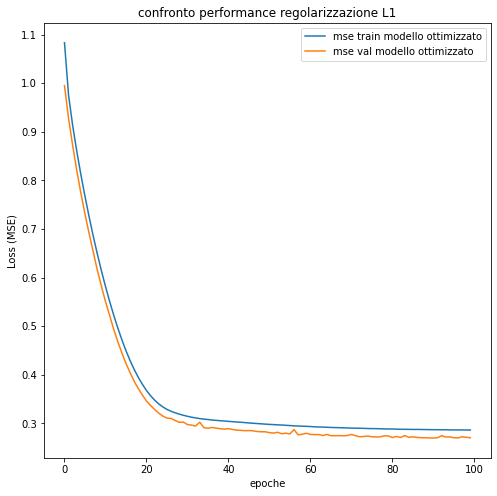

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(train_no_opt_mse, "-*", label = "mse train modello no ottimizzato")
plt.plot(val_no_opt_mse, "-*", label = "mse val modello no ottimizzato")
plt.plot(train_opt_loss, label = "mse train modello ottimizzato")
plt.plot(val_opt_loss, label = "mse val modello ottimizzato")
plt.legend()
plt.ylabel("Loss (MSE)")
plt.xlabel("epoche")
plt.title("confronto performance regolarizzazione L1")